# import

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


# Task 1

The key card is located at: (-0.015384615384615368-9.735801908251373e-17j)


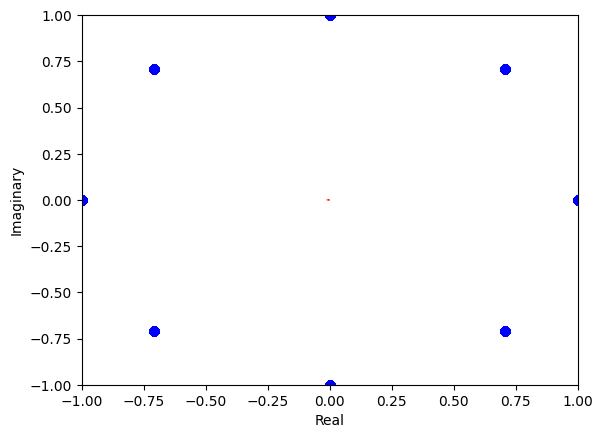

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def hidden_card():
    a = 13  # Define the variable 'a'
    b = (1+1j)  # Define the variable 'b'
    # zinitial initial position of the hidden card
    zinitial = (1 + 1j) / (math.sqrt(2) * (1j**4) * (((b) / np.abs(b))**a))

    # u is next position of the hidden card
    u = math.sqrt(2) / (b)

    # move position by dividing her current position by u
    zposition = np.array([zinitial])

    # creates a plot of the hidden card's position
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    
    # dl moves 64 times until she notices the card in the mean of all 64 times moved
    for i in range(64):
        zposition_new = zposition[i] # or i -1
        zposition_new = zposition_new / u
        zposition = np.append(zposition, zposition_new)
        plt.plot(zposition.real, zposition.imag, 'bo')
    
    # the mean of all 64 times moved
    mean_of_zposition = np.mean(zposition)
    plt.quiver(mean_of_zposition.real, mean_of_zposition.imag, color='red', angles='xy', scale_units='xy', scale=1)
    return mean_of_zposition

mean_of_zposition = hidden_card()
print(f"The key card is located at: {mean_of_zposition}")

# Task 2

Count: 6


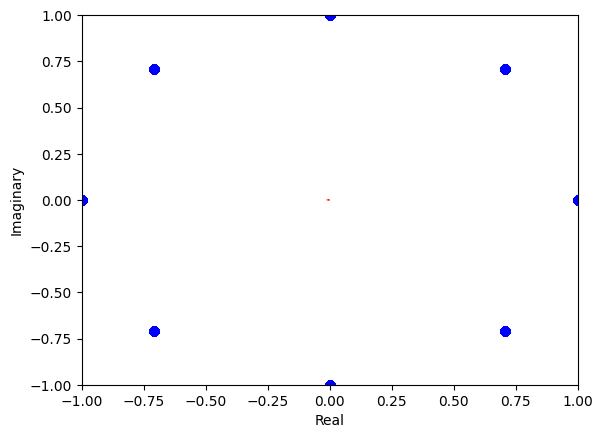

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def second_room(zmean):
    a = 13
    count = 0
    b =(1 + 1j)
    
    # zinitial initial position of the hidden card
    zinitial = (math.sqrt(2) * (b)) / (((b) / math.sqrt(2))**a)

    z_list = np.array([zinitial])
    # u is next position of the hidden card
    u = math.sqrt(2) / (1 + 1j)

    # dl moves up to 64 times. but quicker than the first room as it stops if the card is found in the mean of all 64 times moved
    while count < 64:
        zposition = z_list[count] / u
        z_list = np.append(z_list, zposition)
        zpositionmean2 = np.mean(z_list)

        if np.isclose(zpositionmean2, zmean, atol=1e-1):
            print(f"Count: {count}")
            break
        count += 1
zmean = hidden_card()  # Assuming hidden_card() is defined as in Task 1
second_room(zmean)

# Task 3

C:\Users\riley\AppData\Local\Temp\ipykernel_25532\211882114.py:11: RuntimeWarning: divide by zero encountered in divide
  y = num / den


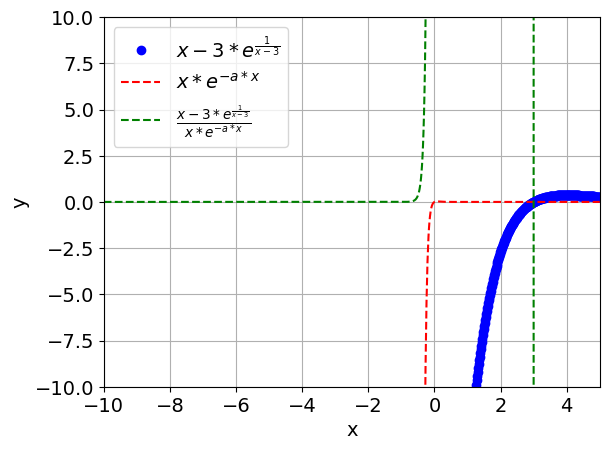

array([ 2.00211477e-51,  2.39823044e-51,  2.87271971e-51,  3.44108975e-51,
        4.12191612e-51,  4.93744995e-51,  5.91434522e-51,  7.08453001e-51,
        8.48625015e-51,  1.01653194e-50,  1.21766168e-50,  1.45858811e-50,
        1.74718590e-50,  2.09288797e-50,  2.50699385e-50,  3.00303905e-50,
        3.59723753e-50,  4.30901174e-50,  5.16162760e-50,  6.18295503e-50,
        7.40637914e-50,  8.87189158e-50,  1.06273980e-49,  1.27302844e-49,
        1.52492928e-49,  1.82667692e-49,  2.18813555e-49,  2.62112146e-49,
        3.13978940e-49,  3.76109531e-49,  4.50535076e-49,  5.39688707e-49,
        6.46485080e-49,  7.74415680e-49,  9.27662983e-49,  1.11123721e-48,
        1.33114016e-48,  1.59456145e-48,  1.91011361e-48,  2.28811373e-48,
        2.74092078e-48,  3.28333979e-48,  3.93310600e-48,  4.71146477e-48,
        5.64386636e-48,  6.76079823e-48,  8.09878202e-48,  9.70156792e-48,
        1.16215655e-47,  1.39215575e-47,  1.66767534e-47,  1.99772489e-47,
        2.39309725e-47,  

In [4]:
def task3():
    a = 13
    mpl.rcParams['font.size'] = 14
    # y = lim x -> 3 (x-3)e^(1/(x-3)) / (x * e^(-ax))
    # approproiate x linspace to see zoomed in plot
    x = np.linspace(-10, 5, 1000)

    num = (x - 3) * (1/np.exp(x-3))
    den = x*np.exp(-a*x)

    y = num / den
    
    plt.plot(x, num, 'bo')
    plt.plot(x, den, 'r--')
    plt.plot(x, y, 'g--')
    plt.legend([r'${x-3}*e^{\frac{1}{x-3}}$', r'$x*e^{-a*x}$', r'$\frac{{x-3}*e^{\frac{1}{x-3}}}{x*e^{-a*x}}$'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-10, 5)
    plt.ylim(-10, 10)
    plt.grid()
    plt.show()
    return y

task3()

# Task 4

In [5]:
import sympy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def task4():
    # implicit equation = Y**2 * (x-2*a)**2 = x**3 - 2*a*x**2+a**2*x
    # rearrange to initialise the implicit equation
    # Y**2 * ((x-3)**2) = (x**3) - a * x * (2*x - a)


    a = 13  #We are group number 13 and a is equal to group number.
    x, y = sp.symbols('x y')

    left_hand_side = (y**2)*((x-3)**2)
    right_hand_side = (x**3) - a * x * (2*x - a)

    eq = sp.Eq(left_hand_side, right_hand_side)

    sp.pprint(eq)
    if sp.solve(eq, y):
        print("The equation is solvable")
    else:
        print("The equation is not solvable")

    # to solve we need to convert the form to explicit form
    # y = (+- sqrt((x**3) - a * x * (2*x - a)) / (x-3))

    # value update
    left_hand_side = (sp.sqrt(left_hand_side)/((x-3)**2))
    right_hand_side = (sp.sqrt(right_hand_side)/((x-3)**2))

    eq = sp.Eq(left_hand_side, right_hand_side)
    sp.pprint(eq)

    if sp.solve(eq, y):
        print("The equation is solvable")
    else:
        print("The equation is not solvable")

    # plot and find domain and range

    right_hand_side = right_hand_side**2
    solved = sp.solve(right_hand_side, x)
    print(solved)

    # [0,3] union [3, 13/2] union [13/2, oo)

task4()


 2        2    3                  
y ⋅(x - 3)  = x  - 13⋅x⋅(2⋅x - 13)
The equation is solvable
   _____________      ______________________
  ╱  2        2      ╱  3                   
╲╱  y ⋅(x - 3)     ╲╱  x  - 13⋅x⋅(2⋅x - 13) 
──────────────── = ─────────────────────────
           2                      2         
    (x - 3)                (x - 3)          
The equation is solvable
[0, 13]


# task 5

{'comb': 13, 'perm': 13, 'Nan': nan, '0': 0}
s is {'comb': 13, 'perm': 13, 'Nan': nan, '0': 0}
p is True
p is True q is False r is True


'Choose the right lift'

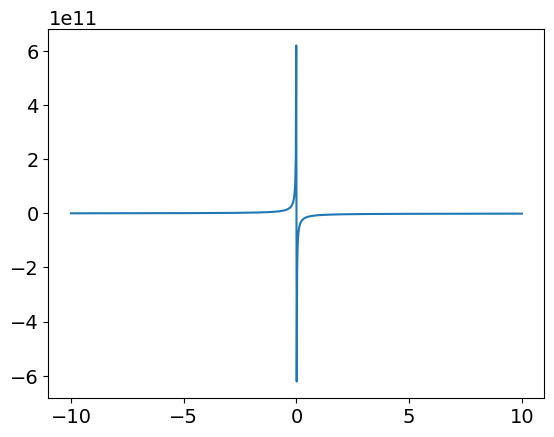

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def evaluate_task5():
    a = 13
    s = {}
    s['comb'] = math.comb(a, 1)  # 13 choose 1
    s['perm'] = int((math.factorial(a)) / math.factorial(a - 1))  # 13 permute 1

    x = np.linspace(-10, 10, 1000)
    y = -(math.factorial(a) / x)
    plt.plot(x, y)
    s['Nan'] = sp.nan
    s['0'] = 0
    print(s)
    
    def implies(a, b):
        if a and not b:
            return False
        return True
    
    print(f"s is {s}")
    
    p = {s['comb'], s['perm']}.intersection({a, 0}) == {a}
    print(f"p is {p}")
    q = {-math.inf}.issubset(s.values())
    r = {0}.issubset(s.values())

    print("p is", p, "q is", q, "r is", r)

    def boolean_algebra(p, q, r):
        return (q ^ p) ^ r and implies(not q, not r)

    left_lift_condition = boolean_algebra(p, q, r)
    
    if left_lift_condition:
        return "Choose the left lift"
    else:
        return "Choose the right lift"
    
evaluate_task5()